#Exercício 01 <br>
Use um gráfico de pizza para retratar os conjuntos de dados a seguir:<br><br>

(a) Investimentos: Resultados de uma pesquisa que investigou as intenções de investimentos de adultos
americanos em 2013, quando comparadas com o ano de 2012 (Fonte: CNN).
 Investir mais em ações – 562  Não investir – 288
 Investir mais em títulos – 144  Investir o mesmo valor de 2012 – 461<br><br>
(b) Maratona da cidade de Nova York: Nacionalidade dos vencedores da prova masculina, até 2012
(Fonte: New York Road Runners).
Estados Unidos – 15 Tanzânia – 1 Grã-Bretanha – 1
Itália – 4 Quênia – 9 Brasil – 2
Etiópia – 2 México – 4 Nova Zelândia – 1
África do Sul – 2 Marrocos – 1

,Intenções,Quantidade
0,Investir mais em ações,562
1,Não investir,1716
2,Investir mais em títulos,144
3,Investir o mesmo valor de 2012,461


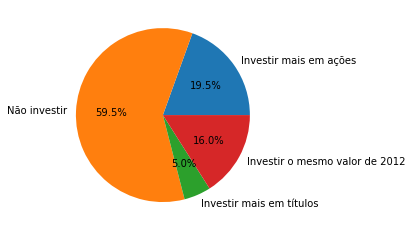

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Criação Conjunto de dados (a)
investimentos = [['Investir mais em ações', 562],['Não investir', 1716],
                 ['Investir mais em títulos', 144], ['Investir o mesmo valor de 2012', 461]]
novo_investimentos = pd.DataFrame(data=investimentos, columns = ['Intenções', 'Quantidade'])
display(novo_investimentos)
# Gráfico de pizza (a)
pizza_investimentos = plt.pie(novo_investimentos['Quantidade'], labels=novo_investimentos['Intenções'],
                              autopct='%1.1f%%') 


,Nacionalidade,Quantidade
0,Estados Unidos,15
1,Tanzânia,1
2,Grã-Bretanha,1
3,Itália,4
4,Quênia,9
5,Brasil,2
6,Etiópia,2
7,México,4
8,Nova Zelândia,1
9,África do Sul,2


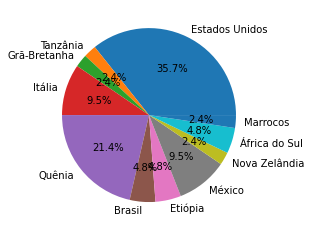

In [ ]:
# Criação Conjunto de dados (b)
maratona = [['Estados Unidos', 15], ['Tanzânia', 1],['Grã-Bretanha', 1],
            ['Itália', 4],['Quênia', 9], ['Brasil', 2],
            ['Etiópia', 2], ['México', 4],['Nova Zelândia', 1],
            ['África do Sul', 2], ['Marrocos', 1]] 
            
nova_maratona = pd.DataFrame(data=maratona, columns=['Nacionalidade', 'Quantidade'])
display(nova_maratona)
# Gráfico de pizza (b)
pizza_maratona = plt.pie(nova_maratona['Quantidade'], labels=nova_maratona['Nacionalidade'], 
                              autopct='%1.1f%%')

#Exercício 02 
A representação gráfica do conjunto de dados do exercício 1(b) não é muito amigável, uma vez que o número de categorias é excessivo. Reorganize o conjunto de dados de forma que as categorias denotem os continentes em que se localizam os países natais dos vencedores da maratona de Nova York. A seguir, construa um novo gráfico de pizza. Qual continente exibe o maior número de vencedores?

,Nacionalidade,Quantidade
0,África,13
1,América,21
2,Oceania,1
3,Europa,5


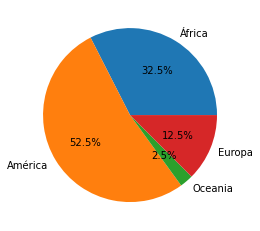

In [ ]:
# Criação Conjunto de dados (b)
maratona_continente = [['África', 13], ['América', 21], ['Oceania', 1], ['Europa', 5]]

nova_maratona = pd.DataFrame(data=maratona_continente, columns=['Nacionalidade', 'Quantidade'])
display(nova_maratona)
# Gráfico de pizza (b)
pizza_maratona_continente = plt.pie(nova_maratona['Quantidade'], labels=nova_maratona['Nacionalidade'], 
                              autopct='%1.1f%%')

#Exercício 03<br>
Use um gráfico de Pareto para retratar os conjuntos de dados a seguir:<br><br>
(a) Olimpíadas: Número de medalhas obtidas por atletas de cinco países nos Jogos Olímpicos de
Londres, em 2012.

Alemanha Grã-Bretanha Estados Unidos Rússia China 44 65 104 82 88<br><br>

(b) Medicamentos: Ocorrência de erros na composição de medicamentos, levantados em um estudo com duração de 2 meses (Fonte: PubMed Central).

Drogas não autorizadas – 27 Omissão – 54 Forma incorreta da droga – 2 Período incorreto – 37 Dose inadequada – 57 Droga deteriorada – 2
                    

,Valores,PorcAcum
Estados Unidos,104,27.154047
China,88,50.130548
Rússia,82,71.540470
Grã-Bretanha,65,88.511749
Alemanha,44,100.000000


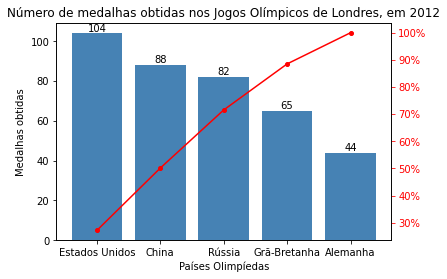

In [ ]:
# Criação do conjunto de dados(a)
dados = pd.DataFrame({'Valores': [44, 65, 104, 82, 88]})
dados.index = ['Alemanha', 'Grã-Bretanha', 'Estados Unidos', 'Rússia', 'China']
# Organizando dados em ordem decrescente
dados = dados.sort_values(by='Valores', ascending = False)
# Criando a coluna de porcentagem acumulada
dados['PorcAcum'] = dados['Valores'].cumsum()/dados['Valores'].sum()*100
display(dados)
# Criação do gráfico de Pareto
from matplotlib.ticker import PercentFormatter
# Definindo cores
cor_barra = 'steelblue'
cor_linha = 'red'
tam_linha = 4
# Construindo gráfico básico(barras)
fig, pareto = plt.subplots()
pareto.bar(dados.index, dados['Valores'], color=cor_barra)
pareto.set(xlabel='Países Olimpíedas',
           ylabel='Medalhas obtidas',
           title='Número de medalhas obtidas nos Jogos Olímpicos de Londres, em 2012')
# Inserção de rótulos nas barras do gráfico de Pareto
barras = pareto.patches
valores = dados['Valores']
for barra, valor in zip(barras, valores):
  altura = barra.get_height()
  pareto.text(barra.get_x()+barra.get_width()/2, altura,
              valor, ha='center', va='bottom')
# Adicionando linha de porcentagem acumulada
linha = pareto.twinx()
linha.plot(dados.index, dados['PorcAcum'],
           color=cor_linha, marker='o',
           ms=tam_linha)
linha.yaxis.set_major_formatter(PercentFormatter())
linha.tick_params(axis='y', colors=cor_linha)

,Valores,PorcAcum
Dose inadequada,57,31.843575
Omissão,54,62.011173
Período incorreto,37,82.681564
Drogas não autorizadas,27,97.765363
Forma incoreta da droga,2,98.882682
Droga deteriorada,2,100.000000


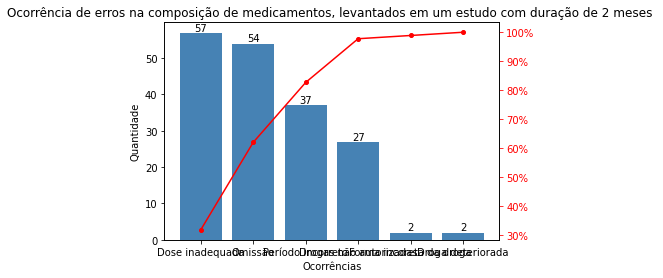

In [ ]:
# Criação do conjunto de dados(b)
dados = pd.DataFrame({'Valores': [27, 54, 2, 37, 57, 2]})
dados.index = ['Drogas não autorizadas', 'Omissão', 'Forma incoreta da droga', 'Período incorreto', 'Dose inadequada', 'Droga deteriorada']
# Organizando dados em ordem decrescente
dados = dados.sort_values(by='Valores', ascending = False)
# Criando a coluna de porcentagem acumulada
dados['PorcAcum'] = dados['Valores'].cumsum()/dados['Valores'].sum()*100
display(dados)
# Criação do gráfico de Pareto
from matplotlib.ticker import PercentFormatter
# Definindo cores
cor_barra = 'steelblue'
cor_linha = 'red'
tam_linha = 4
# Construindo gráfico básico(barras)
fig, pareto = plt.subplots()
pareto.bar(dados.index, dados['Valores'], color=cor_barra)
pareto.set(xlabel='Ocorrências',
           ylabel='Quantidade',
           title='Ocorrência de erros na composição de medicamentos, levantados em um estudo com duração de 2 meses ')

# Inserção de rótulos nas barras do gráfico de Pareto
barras = pareto.patches
valores = dados['Valores']
for barra, valor in zip(barras, valores):
  altura = barra.get_height()
  pareto.text(barra.get_x()+barra.get_width()/2, altura,
              valor, ha='center', va='bottom')
# Adicionando linha de porcentagem acumulada
linha = pareto.twinx()
linha.plot(dados.index, dados['PorcAcum'],
           color=cor_linha, marker='o',
           ms=tam_linha)
linha.yaxis.set_major_formatter(PercentFormatter())
linha.tick_params(axis='y', colors=cor_linha)

#Exercício 04 
Use um diagrama de dispersão para retratar os dados mostrados na tabela. Os dados representam o número de alunos, por professor, e o salário médio dos professores (em milhares de dólares) em 10 escolas.


,Escolas,Número de alunos,Salário médio
0,1,17.1,28.7
1,2,17.5,47.5
2,3,18.9,31.8
3,4,17.1,28.1
4,5,20.0,40.3
5,6,18.6,33.8
6,7,14.4,49.8
7,8,16.5,37.5
8,9,13.3,42.5
9,10,18.4,31.9


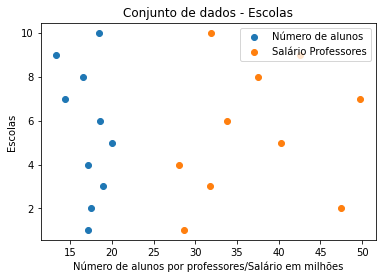

In [ ]:
# Criação do conjunto de dados
dados = pd.DataFrame({'Escolas':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'Número de alunos':[17.1, 17.5, 18.9, 17.1, 20.0, 18.6, 14.4, 16.5, 13.3, 18.4],'Salário médio': [28.7, 47.5, 31.8, 28.1, 40.3, 33.8, 49.8, 37.5, 42.5, 31.9]})
display(dados)
plt.scatter(dados['Número de alunos'], dados['Escolas'])
plt.scatter(dados['Salário médio'], dados['Escolas'])
plt.xlabel('Número de alunos por professores/Salário em milhões')
plt.ylabel('Escolas')
plt.title('Conjunto de dados - Escolas')
plt.legend(['Número de alunos', 'Salário Professores'])

#Exercício 05 
Use um gráfico de série temporal para
retratar os dados mostrados nas tabelas a seguir. Os
dados representam o número de motocicletas (em milhões) registradas no período de 2000 a 2011, nos Estados Unidos. (Fonte: U.S. Federal Highway Administration.)

,Ano,Registros
2000,2000,4.3
2001,2001,4.9
2002,2002,5.0
2003,2003,5.4
2004,2004,5.8
2005,2005,6.2
2006,2006,6.7
2007,2007,7.1
2008,2008,7.8
2009,2009,7.9


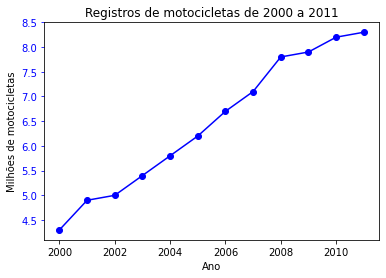

In [ ]:
dados = pd.DataFrame({'Ano':[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011],
                      'Registros': [4.3, 4.9, 5.0, 5.4, 5.8, 6.2, 6.7, 7.1, 7.8, 7.9, 8.2, 8.3]})
dados.index = list(range(2000, 2012))
display(dados)
fig, registros = plt.subplots()
registros.plot(dados.index, dados['Registros'], 'bo-')
registros.set(xlabel='Ano',
              ylabel='Milhões de motocicletas',
              title='Registros de motocicletas de 2000 a 2011')
registros.tick_params(axis='y', colors='blue')